In [1]:
from sklearn import tree
import numpy as np
import pandas as pd

from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

# Lese inn data
Vi leser inn og undersøker dataen

In [2]:
data = pd.read_csv('../datasets/students-academic-performance-dataset/xAPI-Edu-Data.csv')

target = data['Class']
features = data.drop(['Class'],axis=1)
print features.head(3).T

                                   0           1           2
gender                             M           M           M
NationalITy                       KW          KW          KW
PlaceofBirth                  KuwaIT      KuwaIT      KuwaIT
StageID                   lowerlevel  lowerlevel  lowerlevel
GradeID                         G-04        G-04        G-04
SectionID                          A           A           A
Topic                             IT          IT          IT
Semester                           F           F           F
Relation                      Father      Father      Father
raisedhands                       15          20          10
VisITedResources                  16          20           7
AnnouncementsView                  2           3           0
Discussion                        20          25          30
ParentAnsweringSurvey            Yes         Yes          No
ParentschoolSatisfaction        Good        Good         Bad
StudentAbsenceDays      

In [3]:
# Mapper klassene til numeriske verdier
Class_map = {'H':2,
             'M':1,
             'L':0}

target  = target.map(Class_map)


In [4]:
# konvertere categoriske verdier til binære egenskaper
features = pd.get_dummies(features)
features.head().T

0     1     2     3     4
raisedhands                    15.0  20.0  10.0  30.0  40.0
VisITedResources               16.0  20.0   7.0  25.0  50.0
AnnouncementsView               2.0   3.0   0.0   5.0  12.0
Discussion                     20.0  25.0  30.0  35.0  50.0
gender_F                        0.0   0.0   0.0   0.0   0.0
gender_M                        1.0   1.0   1.0   1.0   1.0
NationalITy_Egypt               0.0   0.0   0.0   0.0   0.0
NationalITy_Iran                0.0   0.0   0.0   0.0   0.0
NationalITy_Iraq                0.0   0.0   0.0   0.0   0.0
NationalITy_Jordan              0.0   0.0   0.0   0.0   0.0
NationalITy_KW                  1.0   1.0   1.0   1.0   1.0
NationalITy_Lybia               0.0   0.0   0.0   0.0   0.0
NationalITy_Morocco             0.0   0.0   0.0   0.0   0.0
NationalITy_Palestine           0.0   0.0   0.0   0.0   0.0
NationalITy_SaudiArabia         0.0   0.0   0.0   0.0   0.0
NationalITy_Syria               0.0   0.0   0.0   0.0   0.0
NationalITy_Tunis               0.0   0.0   0.0   0.0   0.0
NationalITy_USA                 0.0   0.0   0.0   0.0   0.0
NationalITy_lebanon             0.0   0.0   0.0   0.0   0.0
NationalITy_venzuela            0.0   0.0   0.0   0.0   0.0
PlaceofBirth_Egypt              0.0   0.0   0.0   0.0   0.0
PlaceofBirth_Iran               0.0   0.0   0.0   0.0   0.0
PlaceofBirth_Iraq               0.0   0.0   0.0   0.0   0.0
PlaceofBirth_Jordan             0.0   0.0   0.0   0.0   0.0
PlaceofBirth_KuwaIT             1.0   1.0   1.0   1.0   1.0
PlaceofBirth_Lybia              0.0   0.0   0.0   0.0   0.0
PlaceofBirth_Morocco            0.0   0.0   0.0   0.0   0.0
PlaceofBirth_Palestine          0.0   0.0   0.0   0.0   0.0
PlaceofBirth_SaudiArabia        0.0   0.0   0.0   0.0   0.0
PlaceofBirth_Syria              0.0   0.0   0.0   0.0   0.0
...                             ...   ...   ...   ...   ...
GradeID_G-08                    0.0   0.0   0.0   0.0   0.0
GradeID_G-09                    0.0   0.0   0.0   0.0   0.0
GradeID_G-10                    0.0   0.0   0.0   0.0   0.0
GradeID_G-11                    0.0   0.0   0.0   0.0   0.0
GradeID_G-12                    0.0   0.0   0.0   0.0   0.0
SectionID_A                     1.0   1.0   1.0   1.0   1.0
SectionID_B                     0.0   0.0   0.0   0.0   0.0
SectionID_C                     0.0   0.0   0.0   0.0   0.0
Topic_Arabic                    0.0   0.0   0.0   0.0   0.0
Topic_Biology                   0.0   0.0   0.0   0.0   0.0
Topic_Chemistry                 0.0   0.0   0.0   0.0   0.0
Topic_English                   0.0   0.0   0.0   0.0   0.0
Topic_French                    0.0   0.0   0.0   0.0   0.0
Topic_Geology                   0.0   0.0   0.0   0.0   0.0
Topic_History                   0.0   0.0   0.0   0.0   0.0
Topic_IT                        1.0   1.0   1.0   1.0   1.0
Topic_Math                      0.0   0.0   0.0   0.0   0.0
Topic_Quran                     0.0   0.0   0.0   0.0   0.0
Topic_Science                   0.0   0.0   0.0   0.0   0.0
Topic_Spanish                   0.0   0.0   0.0   0.0   0.0
Semester_F                      1.0   1.0   1.0   1.0   1.0
Semester_S                      0.0   0.0   0.0   0.0   0.0
Relation_Father                 1.0   1.0   1.0   1.0   1.0
Relation_Mum                    0.0   0.0   0.0   0.0   0.0
ParentAnsweringSurvey_No        0.0   0.0   1.0   1.0   1.0
ParentAnsweringSurvey_Yes       1.0   1.0   0.0   0.0   0.0
ParentschoolSatisfaction_Bad    0.0   0.0   1.0   1.0   1.0
ParentschoolSatisfaction_Good   1.0   1.0   0.0   0.0   0.0
StudentAbsenceDays_Above-7      0.0   0.0   1.0   1.0   1.0
StudentAbsenceDays_Under-7      1.0   1.0   0.0   0.0   0.0

[72 rows x 5 columns]

# Dele inn i test og treningsdata

In [5]:
train_data, test_data, train_target, test_target = train_test_split(features, target, test_size=0.33, random_state=42)

# Beslutningstre

In [6]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=10)
clf.fit(train_data,train_target)

predictions = clf.predict(test_data)
print "Nøyaktighet: %f" %(predictions==test_target).mean()
print confusion_matrix(test_target, predictions)


Nøyaktighet: 0.742138
[[40  6  0]
 [13 60  4]
 [ 0 18 18]]


# Hvilke egenskaper er viktigst?
La oss liste opp de 10 viktigste egenskapene

In [7]:
indices = np.argsort(clf.feature_importances_)[::-1]

print('Egenskap rangering:')

for f in range(10):
    print('%d. egenskap: %d - %s (%f)' % (f+1 , 
                                      indices[f], 
                                      features.columns[indices[f]], 
                                      clf.feature_importances_[indices[f]]))

Egenskap rangering:
1. egenskap: 71 - StudentAbsenceDays_Under-7 (0.343310)
2. egenskap: 1 - VisITedResources (0.313794)
3. egenskap: 0 - raisedhands (0.119072)
4. egenskap: 64 - Relation_Father (0.053797)
5. egenskap: 23 - PlaceofBirth_Jordan (0.029983)
6. egenskap: 54 - Topic_French (0.027627)
7. egenskap: 5 - gender_M (0.027038)
8. egenskap: 2 - AnnouncementsView (0.022642)
9. egenskap: 68 - ParentschoolSatisfaction_Bad (0.021391)
10. egenskap: 36 - StageID_lowerlevel (0.018434)


# SVM klassifisering

In [8]:
clf = SVC()
clf.fit(train_data,train_target)

predictions = clf.predict(test_data)
print "Accuracy score: %f" %(predictions==test_target).mean()
print confusion_matrix(test_target, predictions)

Accuracy score: 0.641509
[[22 23  1]
 [ 6 68  3]
 [ 0 24 12]]


# DecisionTreeRegressor

In [9]:
clf = tree.DecisionTreeRegressor()
clf.fit(train_data,train_target)

predictions = clf.predict(test_data)
print "Accuracy score: %f" %(predictions==test_target).mean()
print confusion_matrix(test_target, predictions)


indices = np.argsort(clf.feature_importances_)[::-1]

print('Egenskap rangering:')

for f in range(10):
    print('%d. egenskap: %d - %s (%f)' % (f+1 , 
                                      indices[f], 
                                      features.columns[indices[f]], 
                                      clf.feature_importances_[indices[f]]))

Accuracy score: 0.723270
[[34 11  1]
 [12 57  8]
 [ 0 12 24]]
Egenskap rangering:
1. egenskap: 70 - StudentAbsenceDays_Above-7 (0.458275)
2. egenskap: 1 - VisITedResources (0.203147)
3. egenskap: 0 - raisedhands (0.062068)
4. egenskap: 2 - AnnouncementsView (0.055893)
5. egenskap: 3 - Discussion (0.037878)
6. egenskap: 54 - Topic_French (0.026814)
7. egenskap: 64 - Relation_Father (0.023392)
8. egenskap: 56 - Topic_History (0.018293)
9. egenskap: 23 - PlaceofBirth_Jordan (0.015061)
10. egenskap: 66 - ParentAnsweringSurvey_No (0.012225)


# Færre egenskaper
La oss prøve å bruke bare to egenskaper (visited resources og raised hands) så vi kan lage opp noen plott

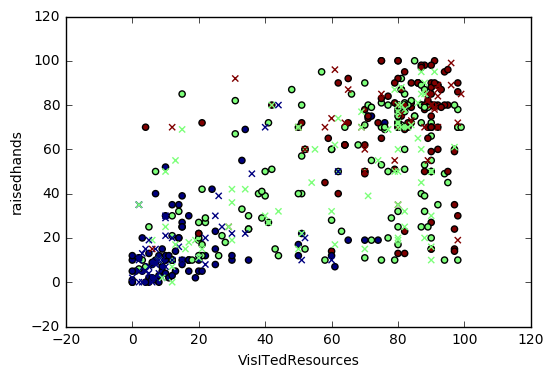

In [10]:
#feature_subset = features[["VisITedResources","raisedhands","AnnouncementsView"]]
feature_subset = features[["VisITedResources","raisedhands"]]

train_data, test_data,train_target,  test_target = train_test_split(feature_subset, target, test_size=0.33, random_state=42)

plt.scatter(train_data.values[:,0],train_data.values[:,1],c=train_target,marker='o')
plt.scatter(test_data.values[:,0],test_data.values[:,1],c=test_target,marker='x')
plt.xlabel(feature_subset.columns[0])
plt.ylabel(feature_subset.columns[1])
plt.show()

In [11]:
clf = KNeighborsClassifier(n_neighbors=30)
#clf = tree.DecisionTreeClassifier(min_samples_leaf=20)
clf.fit(train_data,train_target)

predictions = clf.predict(test_data)
print "Accuracy score: %f" %(predictions==test_target).mean()
print confusion_matrix(test_target, predictions)

Accuracy score: 0.666667
[[33 13  0]
 [12 55 10]
 [ 1 17 18]]


In [12]:
# funksjon for å plotte besluttningsgrense for en klassifikator
def plot_boundary(X,y,clf,plot_step = 0.2):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

(321, 2)


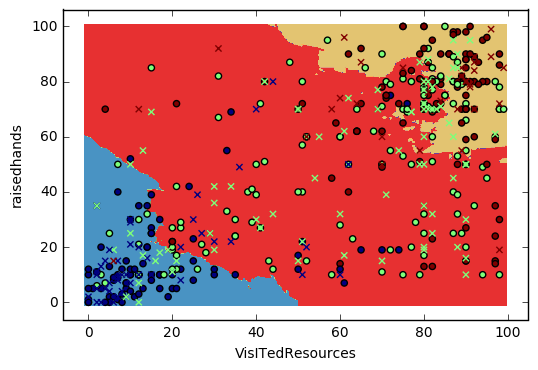

In [13]:
#print train_data
print train_data.shape

plot_boundary(train_data.values,train_target.values,clf)
plt.scatter(train_data.values[:,0],train_data.values[:,1],c=train_target,marker='o')
plt.scatter(test_data.values[:,0],test_data.values[:,1],c=test_target,marker='x') 
#plt.scatter(train_data.values[:,0],train_data.values[:,1],c=train_target)
plt.xlabel(feature_subset.columns[0])
plt.ylabel(feature_subset.columns[1])
plt.show()

Accuracy score: 0.610063
[[32 13  1]
 [14 38 25]
 [ 1  8 27]]


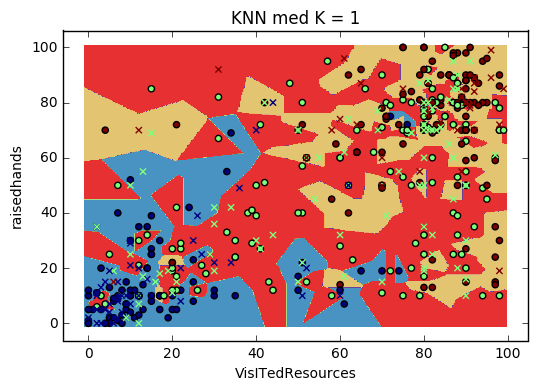

Accuracy score: 0.610063
[[35 11  0]
 [15 45 17]
 [ 1 18 17]]


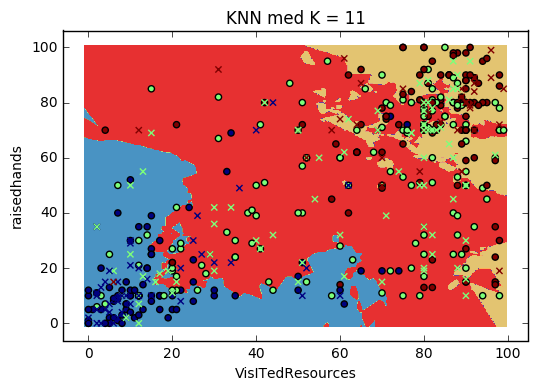

Accuracy score: 0.666667
[[34 12  0]
 [14 52 11]
 [ 1 15 20]]


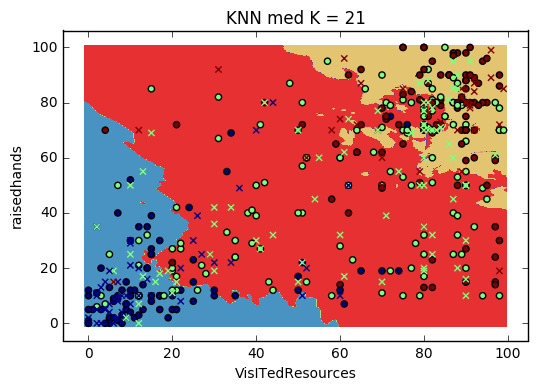

Accuracy score: 0.647799
[[33 13  0]
 [13 54 10]
 [ 1 19 16]]


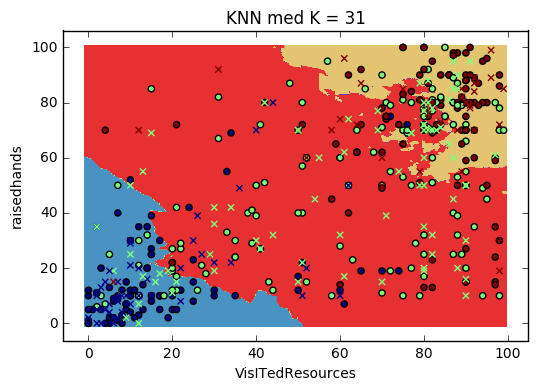

Accuracy score: 0.654088
[[34 12  0]
 [13 52 12]
 [ 1 17 18]]


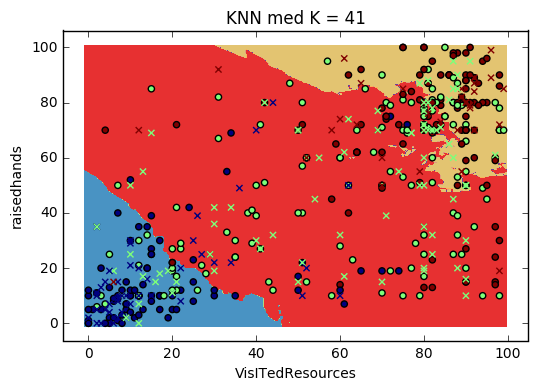

Accuracy score: 0.635220
[[34 12  0]
 [14 50 13]
 [ 1 18 17]]


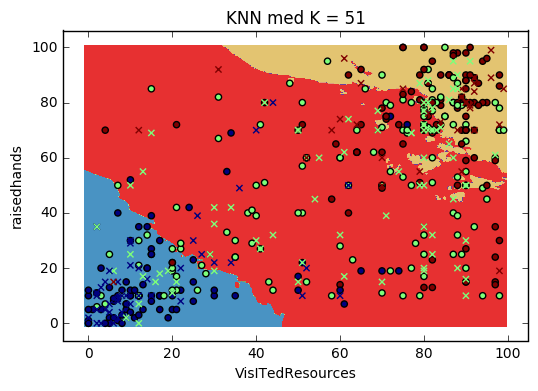

Accuracy score: 0.622642
[[36 10  0]
 [15 45 17]
 [ 2 16 18]]


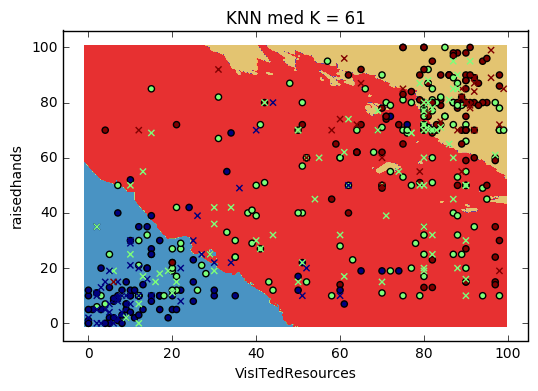

Accuracy score: 0.622642
[[38  8  0]
 [16 42 19]
 [ 2 15 19]]


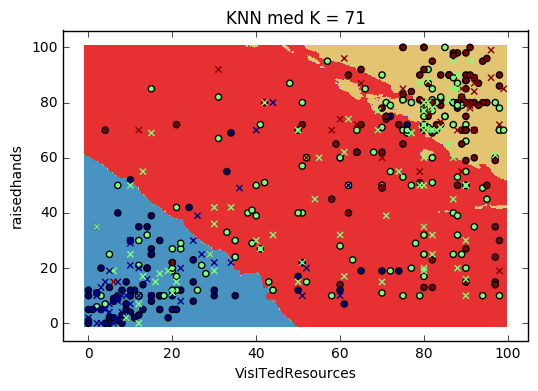

Accuracy score: 0.622642
[[39  7  0]
 [16 41 20]
 [ 2 15 19]]


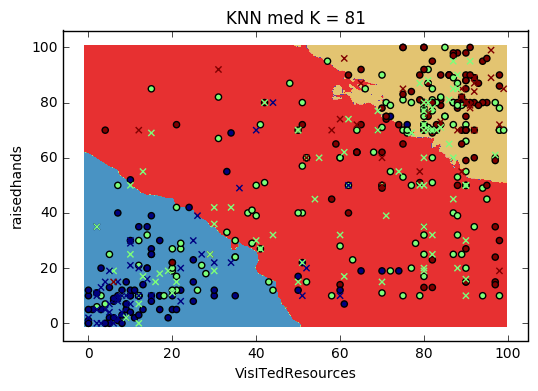

Accuracy score: 0.610063
[[39  7  0]
 [17 37 23]
 [ 2 13 21]]


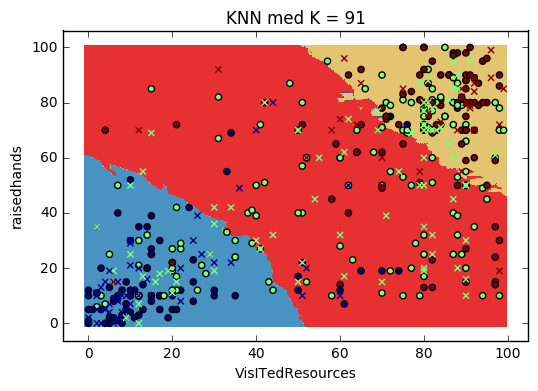

Accuracy score: 0.591195
[[39  7  0]
 [19 34 24]
 [ 2 13 21]]


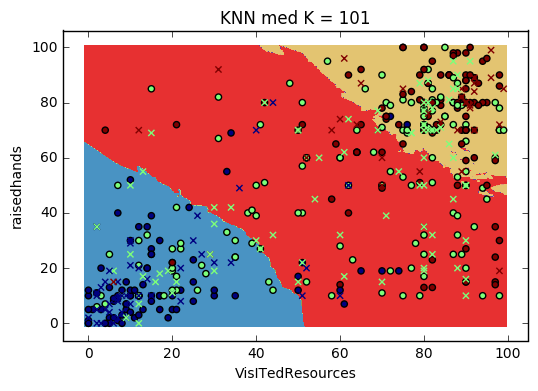

Accuracy score: 0.584906
[[39  7  0]
 [20 33 24]
 [ 2 13 21]]


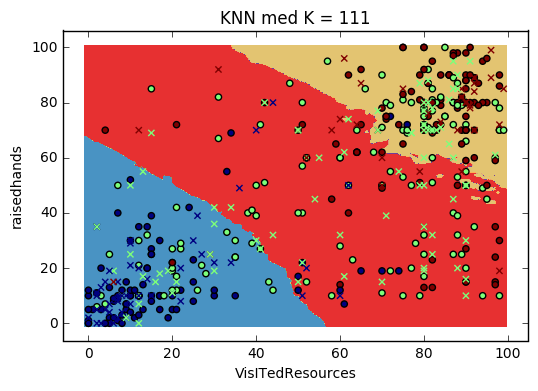

Accuracy score: 0.566038
[[39  7  0]
 [21 30 26]
 [ 2 13 21]]


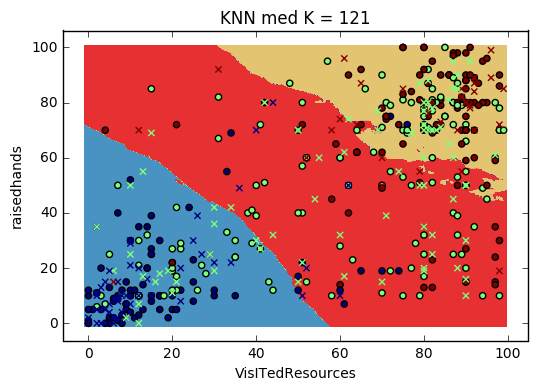

Accuracy score: 0.578616
[[40  6  0]
 [22 30 25]
 [ 2 12 22]]


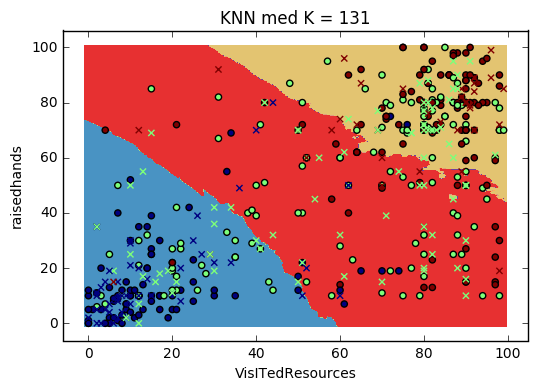

Accuracy score: 0.584906
[[40  6  0]
 [22 29 26]
 [ 2 10 24]]


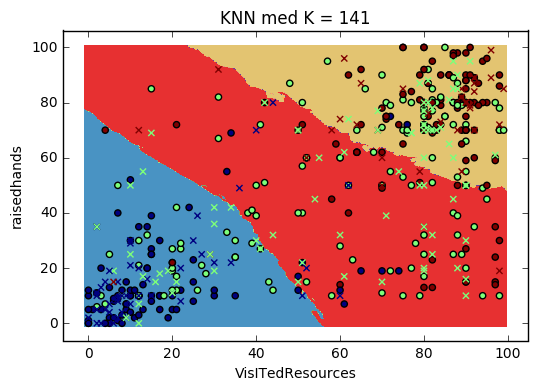

Accuracy score: 0.584906
[[40  6  0]
 [22 27 28]
 [ 2  8 26]]


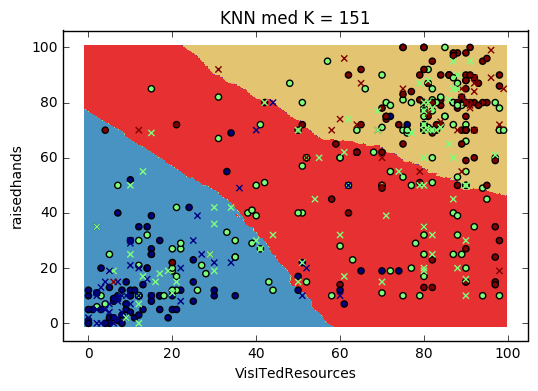

Accuracy score: 0.578616
[[40  5  1]
 [22 26 29]
 [ 2  8 26]]


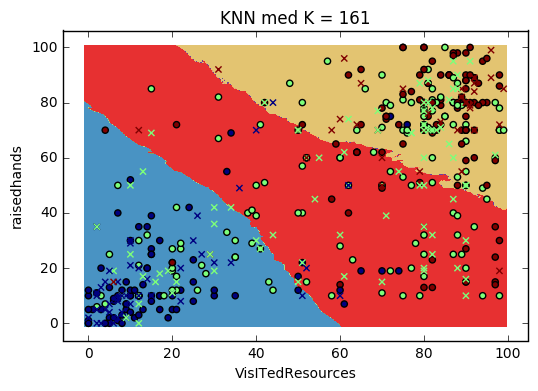

Accuracy score: 0.566038
[[40  5  1]
 [23 23 31]
 [ 2  7 27]]


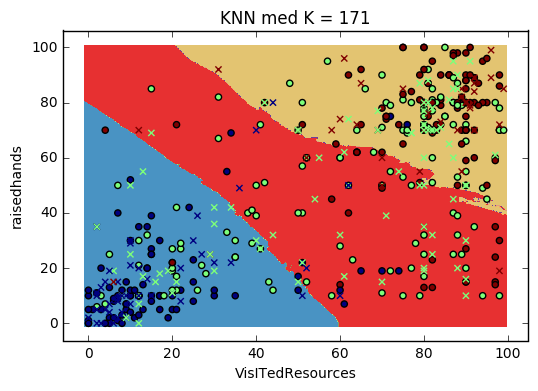

Accuracy score: 0.465409
[[ 5 40  1]
 [ 5 43 29]
 [ 0 10 26]]


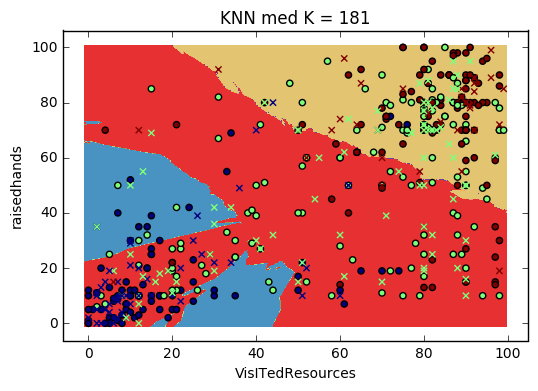

Accuracy score: 0.465409
[[ 0 45  1]
 [ 0 49 28]
 [ 0 11 25]]


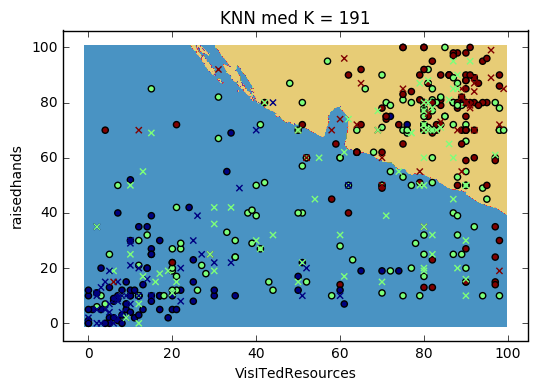

Accuracy score: 0.477987
[[ 0 46  0]
 [ 0 53 24]
 [ 0 13 23]]


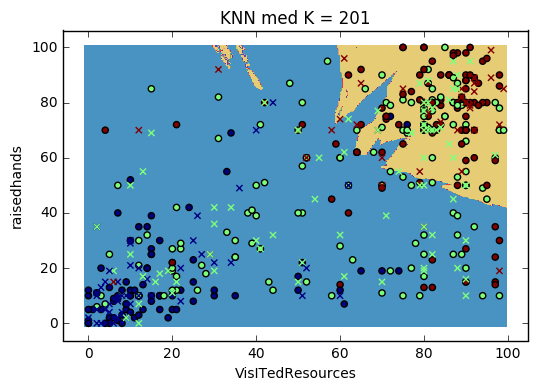

Accuracy score: 0.446541
[[ 0 46  0]
 [ 0 52 25]
 [ 0 17 19]]


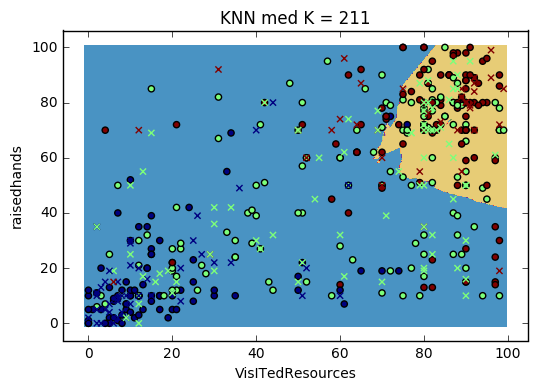

Accuracy score: 0.484277
[[ 0 46  0]
 [ 0 77  0]
 [ 0 36  0]]


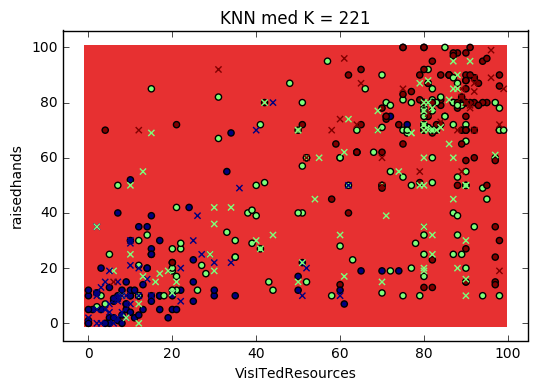

Accuracy score: 0.484277
[[ 0 46  0]
 [ 0 77  0]
 [ 0 36  0]]


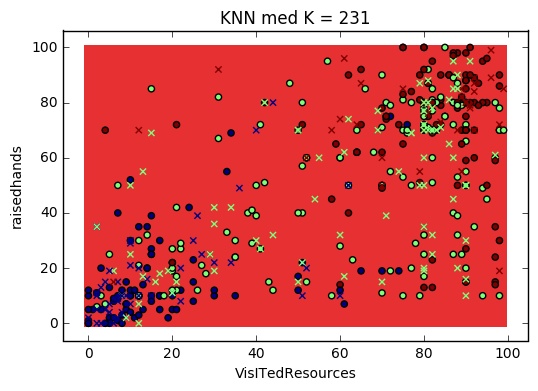

Accuracy score: 0.484277
[[ 0 46  0]
 [ 0 77  0]
 [ 0 36  0]]


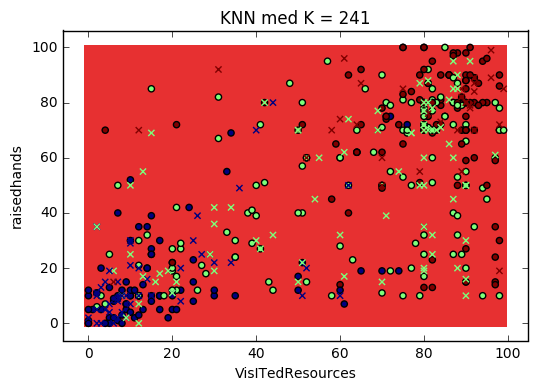

Accuracy score: 0.484277
[[ 0 46  0]
 [ 0 77  0]
 [ 0 36  0]]


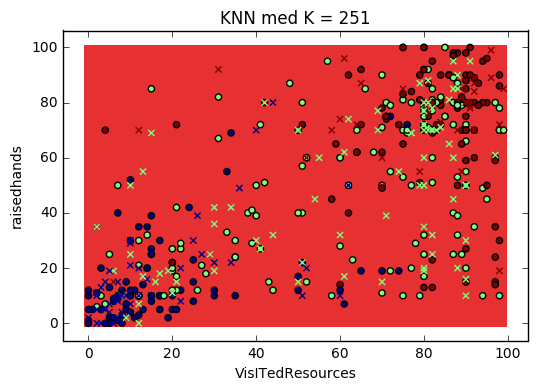

Accuracy score: 0.484277
[[ 0 46  0]
 [ 0 77  0]
 [ 0 36  0]]


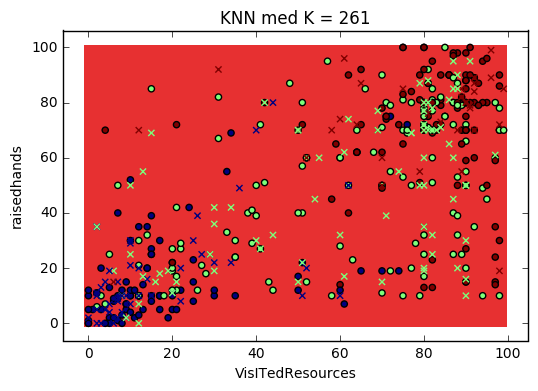

Accuracy score: 0.484277
[[ 0 46  0]
 [ 0 77  0]
 [ 0 36  0]]


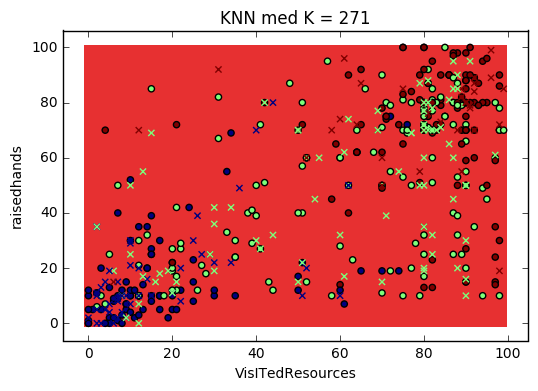

Accuracy score: 0.484277
[[ 0 46  0]
 [ 0 77  0]
 [ 0 36  0]]


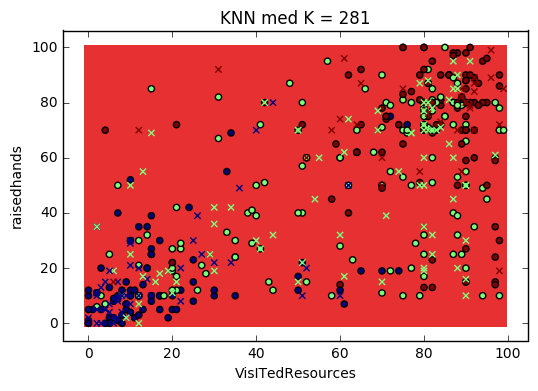

Accuracy score: 0.484277
[[ 0 46  0]
 [ 0 77  0]
 [ 0 36  0]]


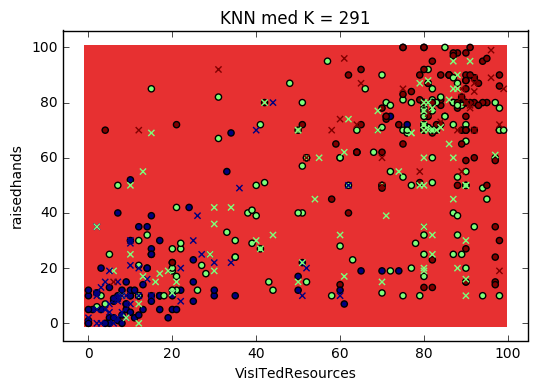

In [14]:
for k in range(1,300,10):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_data,train_target)

    predictions = clf.predict(test_data)
    print "Accuracy score: %f" %(predictions==test_target).mean()
    print confusion_matrix(test_target, predictions)

    plot_boundary(train_data.values,train_target.values,clf)
    plt.scatter(train_data.values[:,0],train_data.values[:,1],c=train_target,marker='o')
    plt.scatter(test_data.values[:,0],test_data.values[:,1],c=test_target,marker='x') 
    #plt.scatter(train_data.values[:,0],train_data.values[:,1],c=train_target)
    plt.xlabel(feature_subset.columns[0])
    plt.ylabel(feature_subset.columns[1])
    plt.title("KNN med K = %d" %k)
    plt.show()

Accuracy score: 0.635220
[[36  9  1]
 [15 47 15]
 [ 2 16 18]]


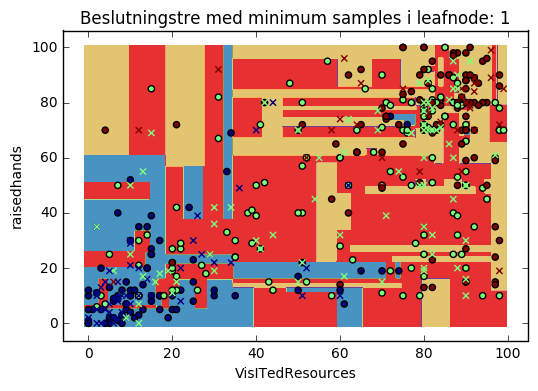

Accuracy score: 0.622642
[[37  9  0]
 [14 45 18]
 [ 2 17 17]]


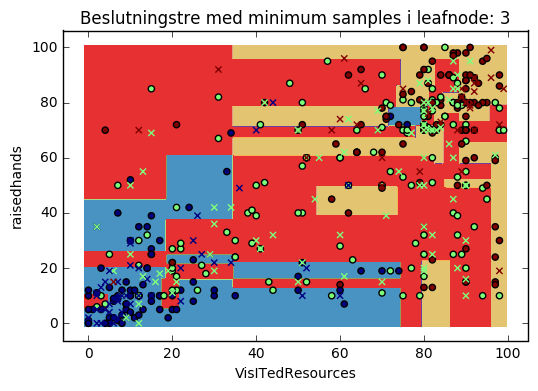

Accuracy score: 0.635220
[[39  6  1]
 [20 46 11]
 [ 4 16 16]]


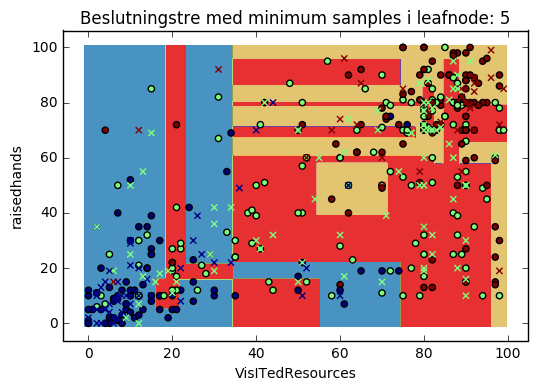

Accuracy score: 0.654088
[[36 10  0]
 [19 48 10]
 [ 2 14 20]]


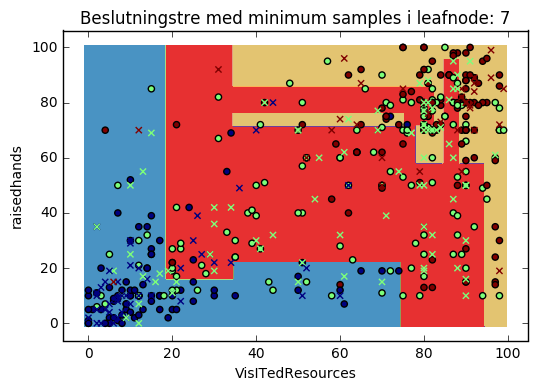

Accuracy score: 0.635220
[[36 10  0]
 [19 44 14]
 [ 2 13 21]]


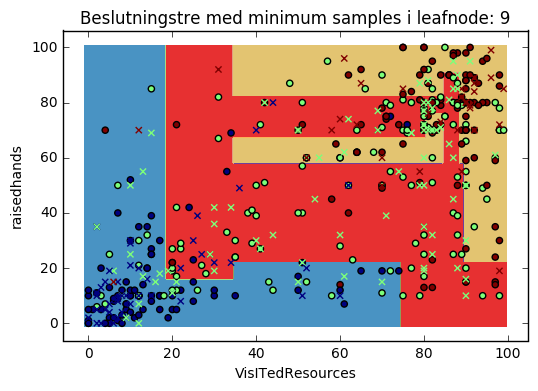

Accuracy score: 0.660377
[[36 10  0]
 [19 48 10]
 [ 2 13 21]]


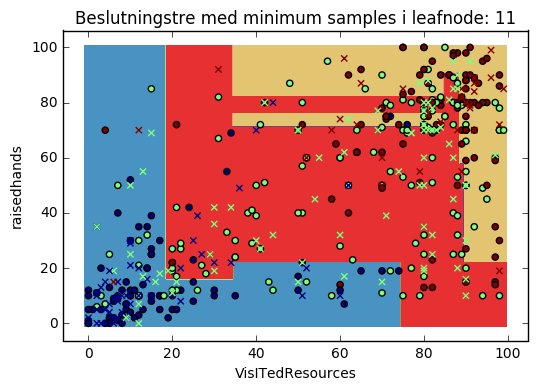

Accuracy score: 0.641509
[[36 10  0]
 [19 51  7]
 [ 2 19 15]]


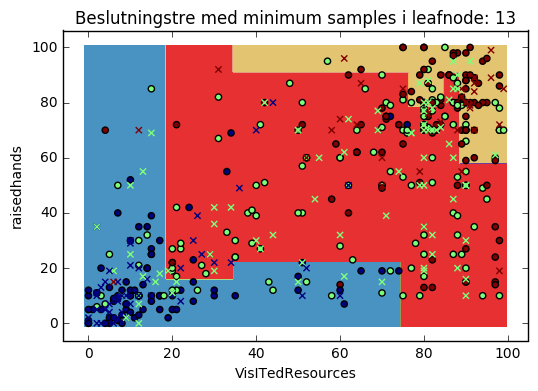

Accuracy score: 0.616352
[[33 13  0]
 [15 48 14]
 [ 2 17 17]]


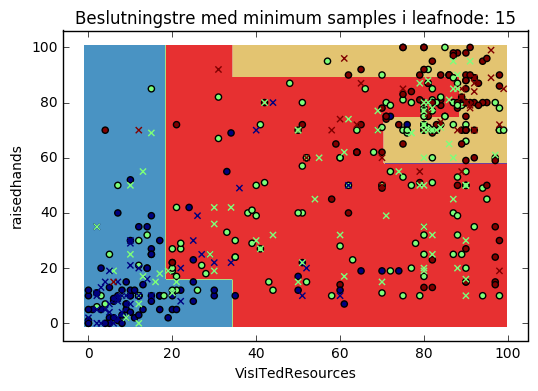

Accuracy score: 0.666667
[[33 13  0]
 [15 58  4]
 [ 2 19 15]]


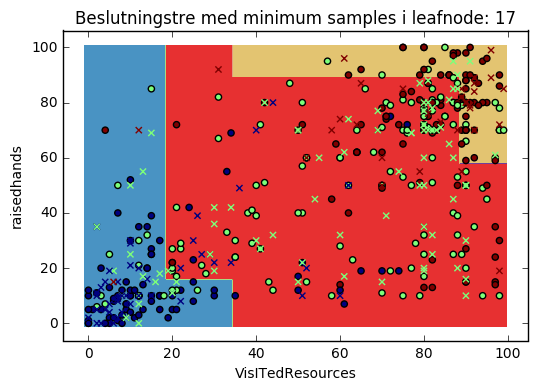

Accuracy score: 0.666667
[[33 13  0]
 [15 58  4]
 [ 2 19 15]]


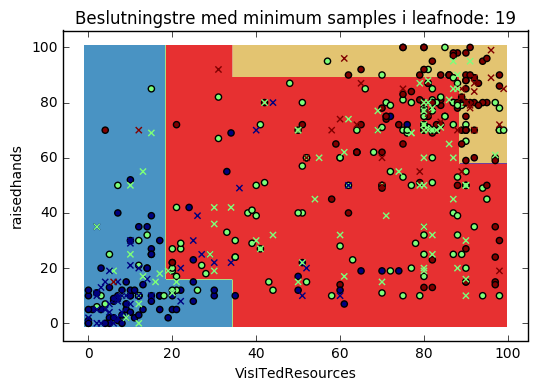

In [15]:
for k in range(1,20,2):
    clf = tree.DecisionTreeClassifier(min_samples_leaf=k)
    #clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_data,train_target)

    predictions = clf.predict(test_data)
    print "Accuracy score: %f" %(predictions==test_target).mean()
    print confusion_matrix(test_target, predictions)

    plot_boundary(train_data.values,train_target.values,clf)
    plt.scatter(train_data.values[:,0],train_data.values[:,1],c=train_target,marker='o')
    plt.scatter(test_data.values[:,0],test_data.values[:,1],c=test_target,marker='x') 
    #plt.scatter(train_data.values[:,0],train_data.values[:,1],c=train_target)
    plt.xlabel(feature_subset.columns[0])
    plt.ylabel(feature_subset.columns[1])
    plt.title("Beslutningstre med minimum samples i leafnode: %d" %k)
    plt.show()

Accuracy score: 0.603774
[[38  8  0]
 [17 34 26]
 [ 2 10 24]]


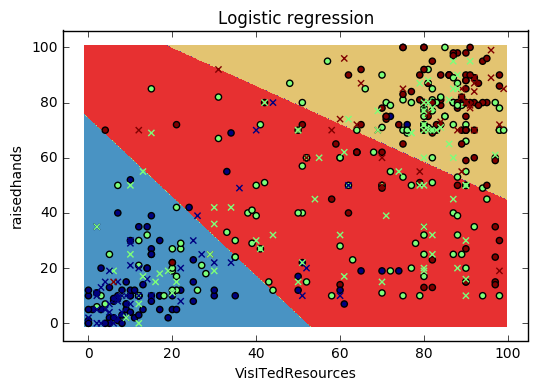

In [16]:
clf = LogisticRegression()
clf.fit(train_data,train_target)

predictions = clf.predict(test_data)
print "Accuracy score: %f" %(predictions==test_target).mean()
print confusion_matrix(test_target, predictions)

plot_boundary(train_data.values,train_target.values,clf)
plt.scatter(train_data.values[:,0],train_data.values[:,1],c=train_target,marker='o')
plt.scatter(test_data.values[:,0],test_data.values[:,1],c=test_target,marker='x') 
#plt.scatter(train_data.values[:,0],train_data.values[:,1],c=train_target)
plt.xlabel(feature_subset.columns[0])
plt.ylabel(feature_subset.columns[1])
plt.title("Logistic regression")
plt.show()